<a href="https://colab.research.google.com/github/mxTuhin/Deshi-Mula-Analysis/blob/main/Deshi_Mula_Data_Visuzaliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
# Set seaborn style explicitly to avoid deprecation warning
sns.set_style('whitegrid')

# Load the dataset
try:
    df = pd.read_csv('DatasetOfCompanyReview.csv')
except FileNotFoundError:
    print("Error: 'Dataset_Of_Company_Review.csv' not found. Please check the file path.")
    exit(1)

# Data Preprocessing
# Remove rows with empty sentiment (marked as fake)
df = df[df['sentiment'].notna() & (df['sentiment'] != '')]

# Convert upvotes and downvotes to numeric, handle non-numeric values
df['upvotes'] = pd.to_numeric(df['upvotes'], errors='coerce').fillna(0).astype(int)
df['downvotes'] = pd.to_numeric(df['downvotes'], errors='coerce').fillna(0).astype(int)

# Mark reviews as Valid (upvotes > downvotes) or Fake
df['review_status'] = df.apply(lambda row: 'Valid' if row['upvotes'] > row['downvotes'] else 'Fake', axis=1)

# Filter valid and fake reviews
valid_reviews = df[df['review_status'] == 'Valid']
fake_reviews = df[df['review_status'] == 'Fake']

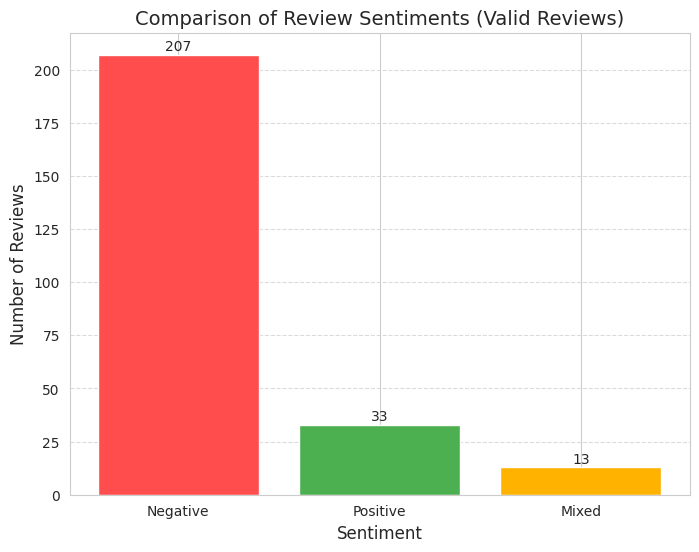

In [61]:
# Chart 1: Comparison of Negative, Positive, Mixed Sentiments
sentiment_counts = valid_reviews['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#ff4d4d', '#4caf50', '#ffb300'])
plt.title('Comparison of Review Sentiments (Valid Reviews)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.savefig('sentiment_comparison.png')
plt.show()
plt.close()

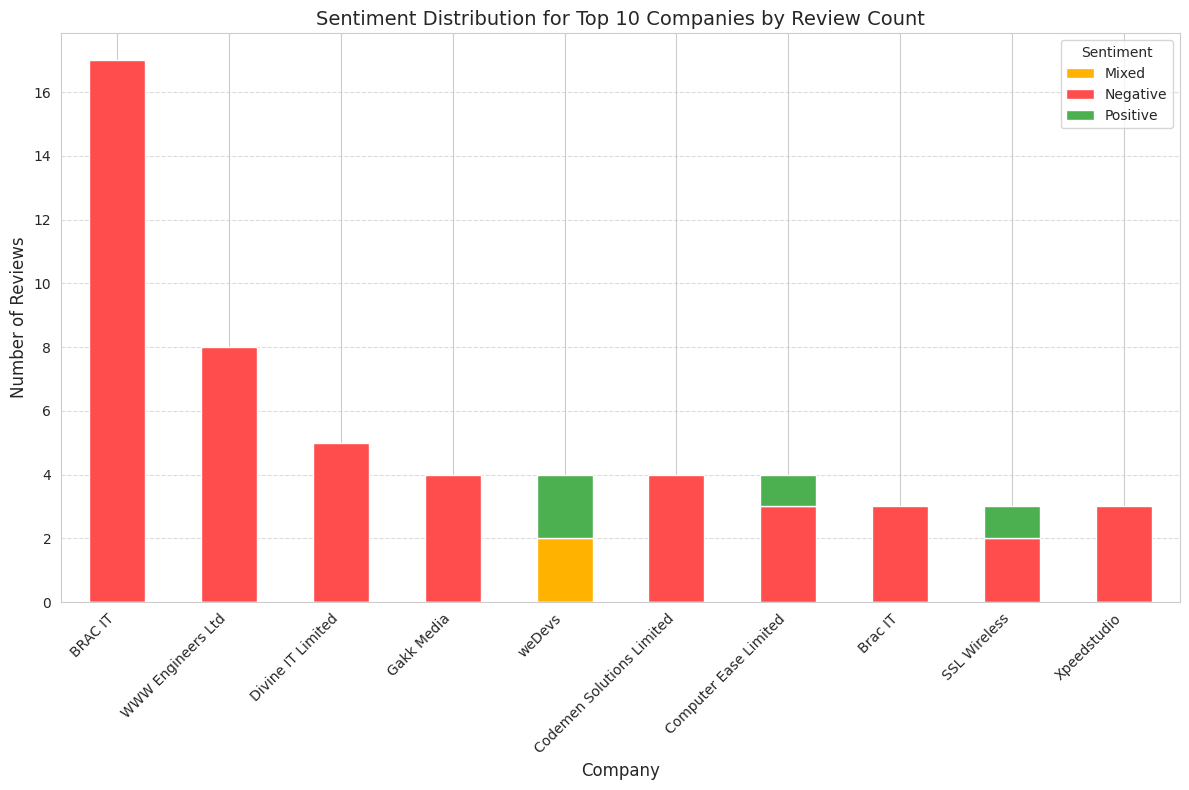

In [62]:
# Chart 2: Review Chart for Top 10 Companies
top_10_companies = valid_reviews['company'].value_counts().head(10).index
top_10_data = valid_reviews[valid_reviews['company'].isin(top_10_companies)]
pivot_data = top_10_data.pivot_table(index='company', columns='sentiment', aggfunc='size', fill_value=0)
pivot_data = pivot_data.reindex(top_10_companies)  # Ensure order matches top 10
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, color=['#ffb300', '#ff4d4d', '#4caf50'], ax=plt.gca())
plt.title('Sentiment Distribution for Top 10 Companies by Review Count', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_companies_reviews.png')
plt.show()
plt.close()

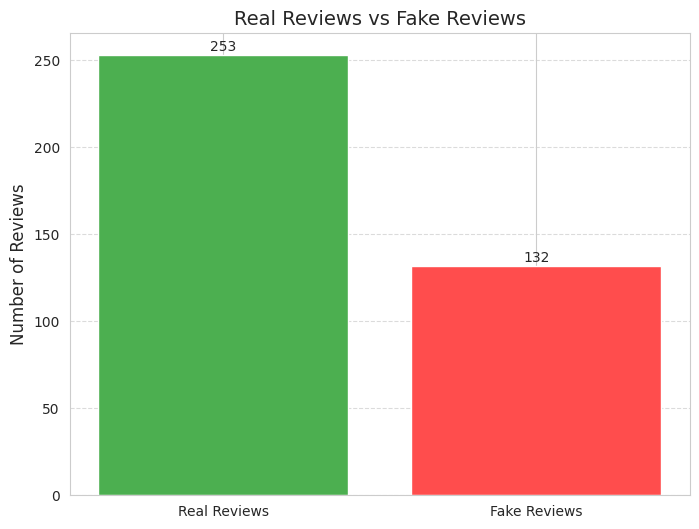

In [63]:
# Chart 3: Real Reviews vs Fake Reviews
real_reviews_count = valid_reviews.shape[0]
fake_reviews_count = fake_reviews.shape[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(['Real Reviews', 'Fake Reviews'], [real_reviews_count, fake_reviews_count], color=['#4caf50', '#ff4d4d'])
plt.title('Real Reviews vs Fake Reviews', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.savefig('real_vs_fake_reviews.png')
plt.show()
plt.close()

<ipython-input-68-d52dd58e6c98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_reviews['score'] = valid_reviews['sentiment'].apply(calculate_score)


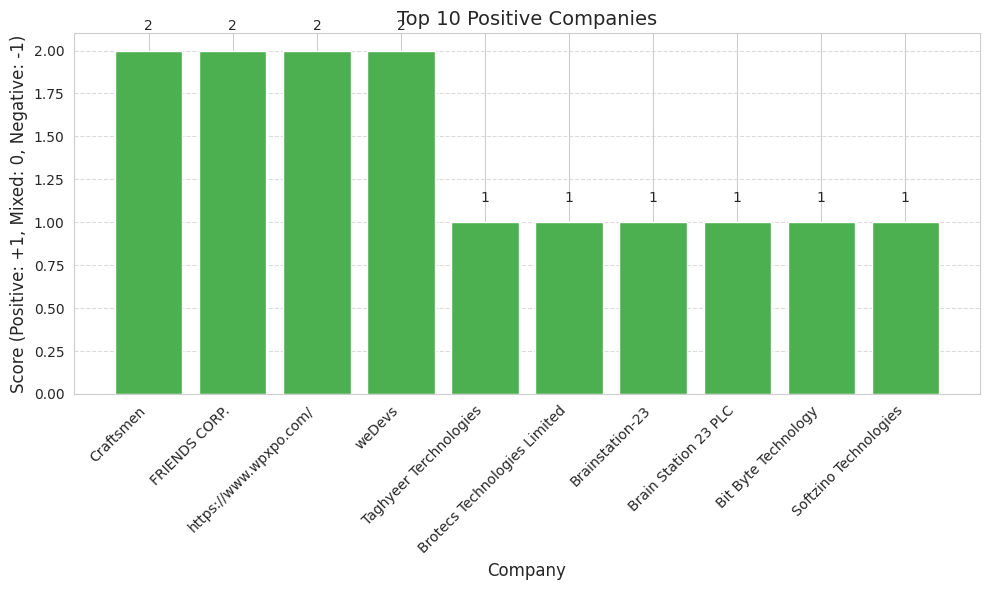

In [68]:

# Calculate company scores for Best and Worst Companies
# Score: Positive = +1, Mixed = 0, Negative = -1
def calculate_score(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    else:
        return 0

valid_reviews['score'] = valid_reviews['sentiment'].apply(calculate_score)
company_scores = valid_reviews.groupby('company')['score'].sum().sort_values()

# Chart 4: Best 5 Companies to Work For
best_5 = company_scores.tail(10).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(best_5.index, best_5.values, color='#4caf50')
plt.title('Top 10 Positive Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Score (Positive: +1, Mixed: 0, Negative: -1)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')
plt.tight_layout()
plt.savefig('best_5_companies.png')
plt.show()
plt.close()

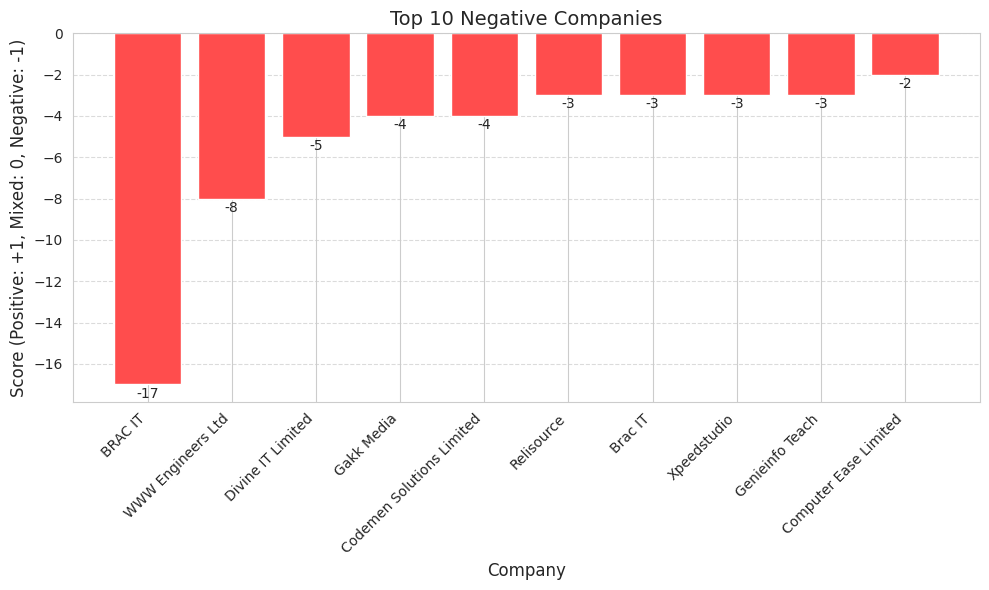

Analysis complete. Charts saved as PNG files.


In [69]:
# Chart 5: Worst 5 Companies to Work For
worst_5 = company_scores.head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(worst_5.index, worst_5.values, color='#ff4d4d')
plt.title('Top 10 Negative Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Score (Positive: +1, Mixed: 0, Negative: -1)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.1, yval, ha='center', va='top')
plt.tight_layout()
plt.savefig('worst_5_companies.png')
plt.show()
plt.close()

print("Analysis complete. Charts saved as PNG files.")


Chart 6a: Sentiment Counts and Row Validation for Top 5 Companies with Most Real Reviews
Row Validation (rows where upvotes > downvotes):
                   row_count  valid_rows
company                                 
BRAC IT                   17          17
Divine IT Limited          5           5
Gakk Media                 4           4
WWW Engineers Ltd          8           8
weDevs                     4           4

Sentiment Breakdown:
sentiment          Negative  Positive  Mixed
company                                     
BRAC IT                  17         0      0
WWW Engineers Ltd         8         0      0
Divine IT Limited         5         0      0
Gakk Media                4         0      0
weDevs                    0         2      2


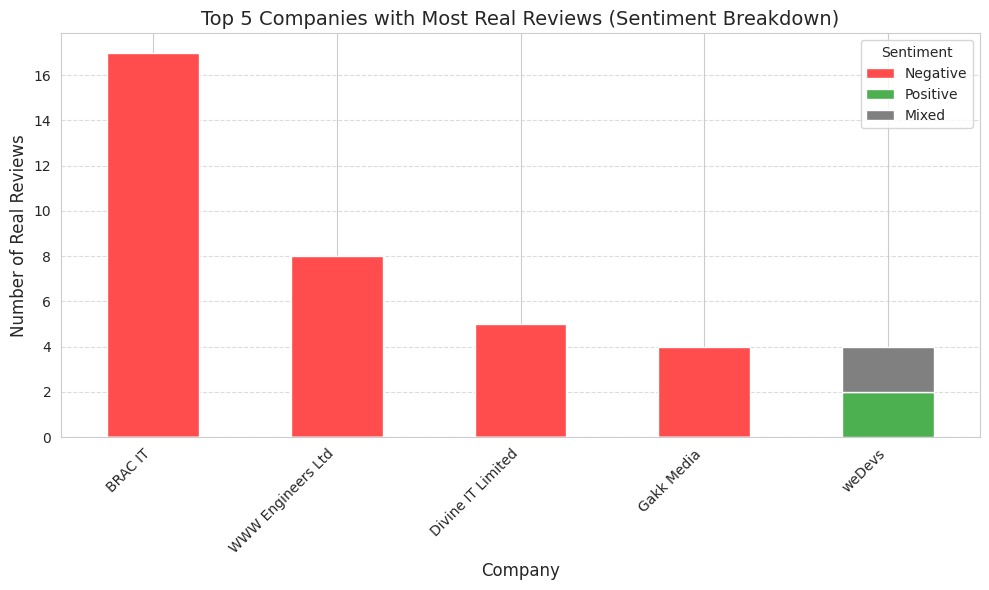


Chart 6b: Sentiment Counts and Row Validation for Top 5 Companies with Most Fake Reviews
Row Validation (rows where upvotes <= downvotes):
                             row_count  fake_rows
company                                          
Appify Devs                          2          2
Codemen Solutions Limited            7          7
GhorerBazar                          2          2
Hyper systems ltd                    2          2
Nagadhat Bangladesh Limited          2          2

Sentiment Breakdown:
sentiment                    Negative  Positive  Mixed
company                                               
Codemen Solutions Limited           7         0      0
Hyper systems ltd                   2         0      0
GhorerBazar                         2         0      0
Nagadhat Bangladesh Limited         1         0      1
Appify Devs                         0         2      0


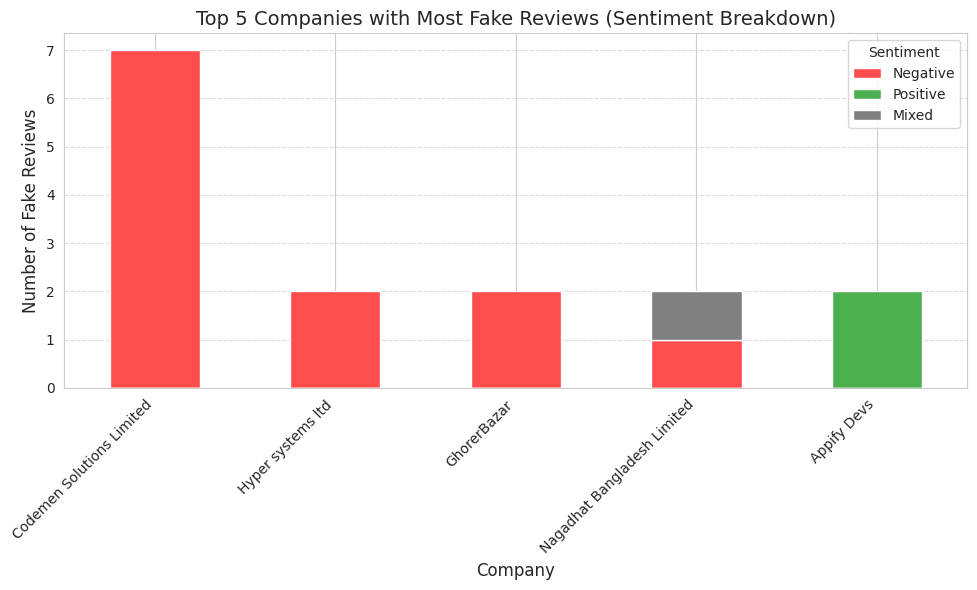

In [66]:
# Chart 6a: Top 5 Companies with Most Real Reviews (with Sentiment Breakdown)
top_5_real = valid_reviews['company'].value_counts().head(5).index
real_data = valid_reviews[valid_reviews['company'].isin(top_5_real)]
pivot_real = real_data.pivot_table(index='company', columns='sentiment', aggfunc='size', fill_value=0)
pivot_real = pivot_real.reindex(top_5_real)  # Ensure order matches top 5

# Validate row-by-row (upvotes > downvotes for real reviews)
real_row_validation = real_data.groupby('company').size().to_frame(name='row_count')
real_row_validation['valid_rows'] = real_data[real_data['upvotes'] > real_data['downvotes']].groupby('company').size()

# Print row counts and sentiment breakdown
print("\nChart 6a: Sentiment Counts and Row Validation for Top 5 Companies with Most Real Reviews")
print("Row Validation (rows where upvotes > downvotes):")
print(real_row_validation.to_string())
print("\nSentiment Breakdown:")
print(pivot_real[['Negative', 'Positive', 'Mixed']].to_string())

plt.figure(figsize=(10, 6))
pivot_real[['Negative', 'Positive', 'Mixed']].plot(kind='bar', stacked=True, color=['#ff4d4d', '#4caf50', '#808080'], ax=plt.gca())  # Red, Green, Grey
plt.title('Top 5 Companies with Most Real Reviews (Sentiment Breakdown)', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Real Reviews', fontsize=12)
plt.legend(title='Sentiment', labels=['Negative', 'Positive', 'Mixed'])
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_5_real_reviews.png')
plt.show()
plt.close()

# Chart 6b: Top 5 Companies with Most Fake Reviews (with Sentiment Breakdown)
top_5_fake = fake_reviews['company'].value_counts().head(5).index
fake_data = fake_reviews[fake_reviews['company'].isin(top_5_fake)]
pivot_fake = fake_data.pivot_table(index='company', columns='sentiment', aggfunc='size', fill_value=0)
pivot_fake = pivot_fake.reindex(top_5_fake)  # Ensure order matches top 5

# Validate row-by-row (upvotes <= downvotes for fake reviews)
fake_row_validation = fake_data.groupby('company').size().to_frame(name='row_count')
fake_row_validation['fake_rows'] = fake_data[fake_data['upvotes'] <= fake_data['downvotes']].groupby('company').size()

# Print row counts and sentiment breakdown
print("\nChart 6b: Sentiment Counts and Row Validation for Top 5 Companies with Most Fake Reviews")
print("Row Validation (rows where upvotes <= downvotes):")
print(fake_row_validation.to_string())
print("\nSentiment Breakdown:")
print(pivot_fake[['Negative', 'Positive', 'Mixed']].to_string())

plt.figure(figsize=(10, 6))
pivot_fake[['Negative', 'Positive', 'Mixed']].plot(kind='bar', stacked=True, color=['#ff4d4d', '#4caf50', '#808080'], ax=plt.gca())  # Red, Green, Grey
plt.title('Top 5 Companies with Most Fake Reviews (Sentiment Breakdown)', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Fake Reviews', fontsize=12)
plt.legend(title='Sentiment', labels=['Negative', 'Positive', 'Mixed'])
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_5_fake_reviews.png')
plt.show()
plt.close()

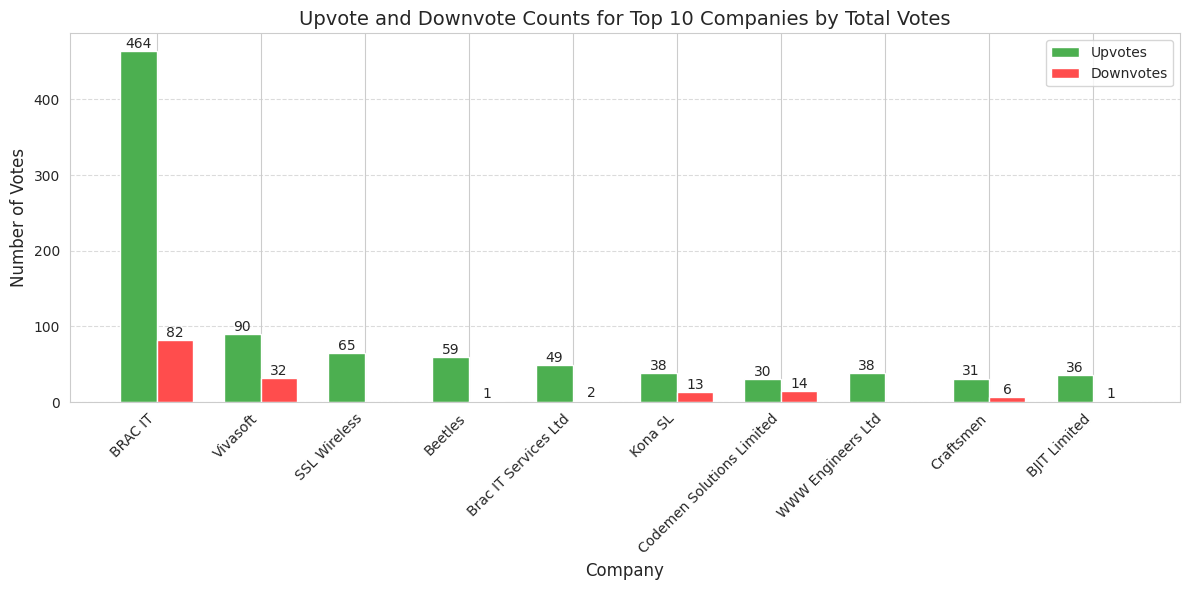

In [67]:
# Chart 7: Upvote and Downvote Counter for Top 10 Companies by Total Votes
# Calculate total votes (upvotes + downvotes) per company
df['total_votes'] = df['upvotes'] + df['downvotes']
top_10_voted = df.groupby('company')['total_votes'].sum().sort_values(ascending=False).head(10).index
vote_data = df[df['company'].isin(top_10_voted)].groupby('company')[['upvotes', 'downvotes']].sum()
vote_data = vote_data.reindex(top_10_voted)  # Ensure order matches top 10

plt.figure(figsize=(12, 6))
x = np.arange(len(top_10_voted))
width = 0.35

bars1 = plt.bar(x - width/2, vote_data['upvotes'], width, label='Upvotes', color='#4caf50')
bars2 = plt.bar(x + width/2, vote_data['downvotes'], width, label='Downvotes', color='#ff4d4d')

plt.title('Upvote and Downvote Counts for Top 10 Companies by Total Votes', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.xticks(x, top_10_voted, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Only label non-zero bars
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('top_10_votes.png')
plt.show()
plt.close()